In [1]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import pandas as pd

In [ ]:
df = pd.read_csv('data/website_ab_test.csv')
df.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [35]:
light = df[df['Theme'] == 'Light Theme']['Conversion Rate']
dark = df[df['Theme'] == 'Dark Theme']['Conversion Rate']

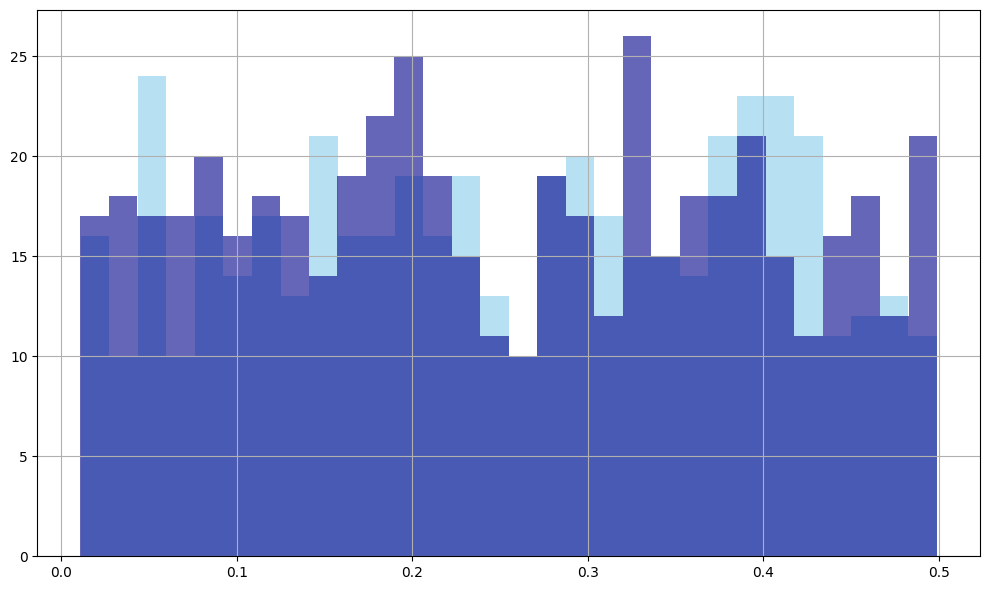

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(light, bins=30, alpha=0.6, color='skyblue')
plt.hist(dark, bins=30, alpha=0.6, color='darkblue')

plt.grid(True)
plt.tight_layout()

plt.show()

In [41]:
t_stat, p_value = ttest_ind(light, dark, equal_var=False)

print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.6f}")
if p_value < 0.05:
    print("Reject the null hypothesis: significant difference in conversion rates")
else:
    print("Fail to reject the null hypothesis: no significant difference in conversion rates")
print("Alternative:")    
if t_stat > 0 and (p_value / 2) > 0.05:
    print("Reject: there is no difference")
else:
    print("Fail to reject: light theme has significantly higher conversion rate")

t-statistic: 0.475
p-value: 0.634998
Fail to reject the null hypothesis: no significant difference in conversion rates
Alternative:
Reject: there is no difference


## Conclusion

Since p_value(0.634998) is much greater than 0.05, we cannot reject the null hypothesis, therefore we can reject alternative hypothesis because there is no significant difference between light and dark themes that impacts conversion rate.

The choice between light and dark themes can be based on user preference, brand identity, or accessibility considerations.